# Mushroom Project 

Have you ever wondered if the mushroom you eat is healthy for you? From over 50,000 species of mushrooms only in North America, how will you classify the mushroom as edible or poisonous? Poisonous mushrooms can be hard to identify in the wild!

In this project, we will examine the data and build different machine learning models that will detect if the mushroom is edible or poisonous by its specifications like cap shape, cap color, gill color, etc. using different classifiers.

The dataset used in this project is mushrooms.csv that contains 8124 instances of mushrooms with 23 features like cap-shape, cap-surface, cap-color, bruises, odor, etc.

The python libraries and packages we’ll use in this project are namely:

    •NumPy
    •Pandas
    •Seaborn
    •Matplotlib
    •Scikit-learn
We’ll use the specifications like cap shape, cap color, gill color, etc. to classify the mushrooms into edible and poisonous.


In [1]:
import pandas as pd
import numpy as np
Mush = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")
Mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [2]:
# from the above figure we can see that veil-type has only one unique value and hence won't contribute anything to the data. So we can safely remove it.
mush = Mush.drop(['veil-type'],axis=1)
mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [3]:
# Let's start with importing necessary libraries

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


In [5]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

No null values, so it's a complete dataset. Let's proceed further.

In [6]:
# Checking counts of poisonous and edible

mush.value_counts('class')


class
e    4208
p    3916
dtype: int64

Poisonous Mushroom (p) => 3916
Edible Mushroom (e) => 4208


Text(0.5, 1.0, 'Checking the Balance in Distribution of class')

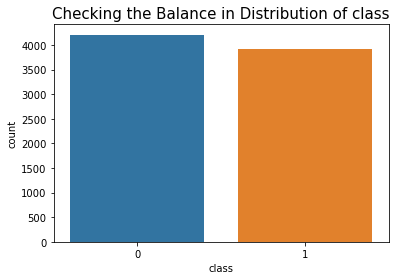

In [30]:
print('Poisonous Mushroom (p) =>',mush.value_counts('class')[1])
print('Edible Mushroom (e) =>',mush.value_counts('class')[0])
sns.countplot(x='class',data=mush)
plt.title("Checking the Balance in Distribution of class",fontsize=15)

So the data is normally distributed, we are good to go.

## All the variables are in string format. Convert Categorical variables to integer using label encoder and get_dummies

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mush1 = le.fit_transform(mush['class'])

mush['class'] = mush1
mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,0,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,0,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [32]:
X = mush.drop(columns = ['class'])
y = mush['class']

In [33]:
X1 = pd.get_dummies(X)
X1

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


Now that we have converted our data into binary it is time for StandardScaler.

In [34]:
scaler = StandardScaler()
X1_scaler = scaler.fit_transform(X1)
X1_scaler

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [35]:
# transform our dataset into train_test_split for testing
x_train,x_test,y_train,y_test = train_test_split(X1_scaler,y, test_size = 0.20, random_state = 355)

In [36]:
# importing LogisticRegression one of the most fundamental algorithmns for classification.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


lr.fit(x_train, y_train)

LogisticRegression()

In [14]:
y_pred = lr.predict(x_test)

In [15]:
y_pred

array([0, 0, 1, ..., 0, 1, 1])

Checking the accuracy score for this LogisticRegression Model.

In [16]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

In [17]:
# confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[854,   0],
       [  0, 771]])

In [18]:
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       854
           1       1.00      1.00      1.00       771

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



#### Since the accuracy, f1-score, confusion_matrix and other parameter are giving 100%, we cann't be sure without testing in other Models such as.

In [37]:
# Importing KNN to cross check if my model is overfitting or not
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score


In [38]:
cross_val_score(KNeighborsClassifier(), X1_scaler, y, cv=10)

array([0.72447724, 1.        , 0.99876999, 1.        , 0.99507389,
       1.        , 1.        , 1.        , 0.93719212, 1.        ])

In [39]:
cross_val_score(KNeighborsClassifier(), X1_scaler, y, cv=5).mean()

0.9317902993558166

KNN model gives 93% score, now we must check with other Model if the score is same or different.

In [22]:
from sklearn.tree import DecisionTreeClassifier
# Let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
clf.score(x_train,y_train)

1.0

In [23]:
accuracy_score(y_test,y_pred)

1.0

Decision tree is also giving us 100% accuracy, now we can say that our model is not overfitting.

But, let's check the roc_auc_score, fpr, tpr, thresholds and plot the ROC curve for better understanding.

In [42]:
fpr,tpr, thresholds = roc_curve(y_test,y_pred)

In [43]:
# AUC score
auc = roc_auc_score(y_test,y_pred)
print(auc)

1.0


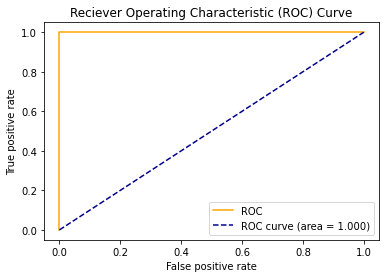

In [45]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='ROC curve (area = %0.3f)'% auc )
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Now it is clear that our model is 100% correct by looking at this ROC curve.

Now for the last part we must save our model for future predictions.

In [46]:
# Import pickle to save the model.
import pickle
pickle.dump(lr,open('Mushroom.pkl','wb'))